# **Data Description**

**URL**: The URL of the article.

**Title**: The title of the article.

**Timedelta**: The number of days between the publication of the article and the dataset acquisition date.

**N_Tokens_Content**: The number of tokens (words) in the content of the article.

**N_Unique_Tokens**: The ratio of unique tokens to the total number of tokens in the content.

**N_non_Stop_Words**: The ratio of non-stop words to the total number of words in the content.

**N_Non_Stop_Unique_Tokens**: The ratio of unique non-stop words to the total number of words in the content.

**Num_Hrefs**: The number of hyperlinks in the article.

**Num_Self_Hrefs**: The number of hyperlinks that point to other articles published by the same website.

**Num_Imgs**: The number of images in the article.

**Num_Videos**: The number of videos in the article.

**Average_Token_Length**: The average length of tokens (words) in the content.

**Num_Keywords**: The number of keywords associated with the article.

**Channel_Type**: The type of channel the article was published in.

**kw_min_min**: The minimum number of times a keyword appeared in the content (in the dataset's smallest window).

**kw_max_min**: The maximum number of times a keyword appeared in the content (in the dataset's smallest window).

**kw_avg_min**: The average number of times a keyword appeared in the content (in the dataset's smallest window).

**kw_min_max**: The minimum number of times a keyword appeared in the content (in the dataset's largest window).

**kw_max_max**: The maximum number of times a keyword appeared in the content (in the dataset's largest window).

**kw_avg_max**: The average number of times a keyword appeared in the content (in the dataset's largest window).

**kw_min_avg**: The minimum average number of times a keyword appeared in the content (across all windows).

**kw_max_avg**: The maximum average number of times a keyword appeared in the content (across all windows).

**kw_avg_avg**: The average average number of times a keyword appeared in the content (across all windows).

**self_reference_min_shares**: The minimum number of shares for articles published by the same website.

**self_reference_max_shares**: The maximum number of shares for articles published by the same website.

**self_reference_avg_sharess**: The average number of shares for articles published by the same website.

**weekday**: The day of the week the article was published.

**isWeekEnd**: Whether the article was published on a weekend (1 for yes, 0 for no).

**LDA_00 to LDA_04**: Latent Dirichlet Allocation (LDA) topic features.

**global_subjectivity**: The subjectivity score of the article.

**global_sentiment_polarity**: The sentiment polarity score of the article.

**global_rate_positive_words**: The rate of positive words in the article.

**global_rate_negative_words**: The rate of negative words in the article.

**rate_positive_words**: The rate of positive words among non-neutral tokens.

**rate_negative_words**: The rate of negative words among non-neutral tokens.

**avg_positive_polarity**: The average polarity score of positive words.

**min_positive_polarity**: The minimum polarity score of positive words.

**max_positive_polarity**: The maximum polarity score of positive words.

**avg_negative_polarity**: The average polarity score of negative words.

**min_negative_polarity**: The minimum polarity score of negative words.

**max_negative_polarity**: The maximum polarity score of negative words.

**shares**: The number of shares the article received on social media.


# **Data Overview**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import ttest_ind
from sklearn.feature_extraction import DictVectorizer
import re
from sklearn.model_selection import GridSearchCV
from scipy.stats import yeojohnson
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("OnlineArticlesPopularity.csv")

In [ ]:
df.columns

Index(['url', 'title', ' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'channel type', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'weekday', 'isWeekEnd', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' shares'],
      dtype='objec

In [ ]:
df.columns

Index(['url', 'title', ' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'channel type', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'weekday', 'isWeekEnd', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' shares'],
      dtype='objec

In [ ]:
df.shape

(38643, 46)

In [ ]:
df.columns

Index(['url', 'title', ' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'channel type', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'weekday', 'isWeekEnd', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' shares'],
      dtype='objec

In [ ]:
df.head()

url  \
0  http://mashable.com/2013/09/30/facebook-graph-...   
1  http://mashable.com/2014/07/29/connie-britton-...   
2  http://mashable.com/2013/08/09/how-to-prevent-...   
3  http://mashable.com/2013/12/10/ed-norton-veriz...   
4  http://mashable.com/2014/09/12/oscar-pistorius...   

                                            title   timedelta  \
0             facebook-graph-search-conversations         465   
1  connie-britton-geena-rocero-social-good-summit         163   
2                     how-to-prevent-porn-sexting         517   
3                      ed-norton-verizon-droid-ad         394   
4                   oscar-pistorius-verdict-trial         117   

    n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               1011          0.469819                1.0   
1                161          0.647799                1.0   
2                207          0.626214                1.0   
3                252          0.581301                1.0   
4                463          0.515419                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.671210          20                5          1  ...   
1                   0.747368           7                5          3  ...   
2                   0.807018           5                2          0  ...   
3                   0.729730           5                3          1  ...   
4                   0.682657           2                2          1  ...   

    global_rate_negative_words   rate_positive_words   rate_negative_words  \
0                     0.025717              0.666667              0.333333   
1                     0.018634              0.785714              0.214286   
2                     0.009662              0.777778              0.222222   
3                     0.000000              1.000000              0.000000   
4                     0.036717              0.433333              0.566667   

   avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0               0.334834                0.033333                     1.0   
1               0.291667                0.033333                     0.5   
2               0.411395                0.214286                     0.5   
3               0.313300                0.033333                     0.5   
4               0.265297                0.062500                     0.5   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.295833                    -1.0                  -0.050   
1               -0.275000                    -0.4                  -0.125   
2               -0.300000                    -0.4                  -0.200   
3                0.000000                     0.0                   0.000   
4               -0.227941                    -0.8                  -0.100   

    shares  
0     3500  
1     1200  
2     2300  
3     1700  
4      869  

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          38643 non-null  object 
 1   title                        38643 non-null  object 
 2    timedelta                   38643 non-null  int64  
 3    n_tokens_content            38643 non-null  int64  
 4    n_unique_tokens             38643 non-null  float64
 5    n_non_stop_words            38643 non-null  float64
 6    n_non_stop_unique_tokens    38643 non-null  float64
 7    num_hrefs                   38643 non-null  int64  
 8    num_self_hrefs              38643 non-null  int64  
 9    num_imgs                    38643 non-null  int64  
 10   num_videos                  38643 non-null  int64  
 11   average_token_length        38643 non-null  float64
 12   num_keywords                38643 non-null  int64  
 13  channel type    

In [ ]:
df.describe().T

count           mean            std      min  \
 timedelta                   38643.0     354.594726     214.119175  8.00000   
 n_tokens_content            38643.0     547.139611     471.285578  0.00000   
 n_unique_tokens             38643.0       0.548412       3.565953  0.00000   
 n_non_stop_words            38643.0       0.996972       5.298498  0.00000   
 n_non_stop_unique_tokens    38643.0       0.689356       3.306746  0.00000   
 num_hrefs                   38643.0      10.891390      11.332647  0.00000   
 num_self_hrefs              38643.0       3.296250       3.854513  0.00000   
 num_imgs                    38643.0       4.539218       8.308654  0.00000   
 num_videos                  38643.0       1.256321       4.131928  0.00000   
 average_token_length        38643.0       4.547656       0.846581  0.00000   
 num_keywords                38643.0       7.226044       1.909869  1.00000   
 kw_min_min                  38643.0      26.088011      69.609183 -1.00000   
 kw_max_min                  38643.0    1156.202519    3892.145609  0.00000   
 kw_avg_min                  38643.0     312.816936     626.353999 -1.00000   
 kw_min_max                  38643.0   13625.673291   58031.453869  0.00000   
 kw_max_max                  38643.0  752473.933183  214363.025346  0.00000   
 kw_avg_max                  38643.0  259193.638914  134996.371343  0.00000   
 kw_min_avg                  38643.0    1117.454576    1137.291237 -1.00000   
 kw_max_avg                  38643.0    5651.122275    6076.435635  0.00000   
 kw_avg_avg                  38643.0    3134.412244    1315.974465  0.00000   
 self_reference_min_shares   38643.0    3951.234167   18996.051347  0.00000   
 self_reference_max_shares   38643.0   10306.556059   40768.485474  0.00000   
 self_reference_avg_sharess  38643.0    6358.404813   23588.414078  0.00000   
 LDA_00                      38643.0       0.184760       0.263097  0.00000   
 LDA_01                      38643.0       0.141320       0.219655  0.00000   
 LDA_02                      38643.0       0.216204       0.282227  0.00000   
 LDA_03                      38643.0       0.223535       0.295067  0.00000   
 LDA_04                      38643.0       0.234156       0.289245  0.00000   
 global_subjectivity         38643.0       0.443244       0.116722  0.00000   
 global_sentiment_polarity   38643.0       0.119350       0.096870 -0.39375   
 global_rate_positive_words  38643.0       0.039631       0.017435  0.00000   
 global_rate_negative_words  38643.0       0.016605       0.010835  0.00000   
 rate_positive_words         38643.0       0.682189       0.190380  0.00000   
 rate_negative_words         38643.0       0.287715       0.156116  0.00000   
 avg_positive_polarity       38643.0       0.353707       0.104652  0.00000   
 min_positive_polarity       38643.0       0.095275       0.071234  0.00000   
 max_positive_polarity       38643.0       0.756910       0.247932  0.00000   
 avg_negative_polarity       38643.0      -0.259458       0.127709 -1.00000   
 min_negative_polarity       38643.0      -0.521957       0.290418 -1.00000   
 max_negative_polarity       38643.0      -0.107384       0.095167 -1.00000   
 shares                      38643.0    3403.460549   11742.470755  1.00000   

                                       25%            50%            75%  \
 timedelta                      164.000000     339.000000     542.000000   
 n_tokens_content               247.000000     410.000000     717.000000   
 n_unique_tokens                  0.470709       0.539130       0.608302   
 n_non_stop_words                 1.000000       1.000000       1.000000   
 n_non_stop_unique_tokens         0.625581       0.690411       0.754286   
 num_hrefs                        4.000000       8.000000      14.000000   
 num_self_hrefs                   1.000000       3.000000       4.000000   
 num_imgs                         1.000000       1.000000       4.000000   
 num_videos                 

In [ ]:
df.dtypes

url                             object
title                           object
 timedelta                       int64
 n_tokens_content                int64
 n_unique_tokens               float64
 n_non_stop_words              float64
 n_non_stop_unique_tokens      float64
 num_hrefs                       int64
 num_self_hrefs                  int64
 num_imgs                        int64
 num_videos                      int64
 average_token_length          float64
 num_keywords                    int64
channel type                    object
 kw_min_min                      int64
 kw_max_min                    float64
 kw_avg_min                    float64
 kw_min_max                      int64
 kw_max_max                      int64
 kw_avg_max                    float64
 kw_min_avg                    float64
 kw_max_avg                    float64
 kw_avg_avg                    float64
 self_reference_min_shares     float64
 self_reference_max_shares     float64
 self_reference_avg_share

# **Data Preprocessing**

### **Duplicates**

In [ ]:
df.duplicated().sum()

0

### **Nulls**

In [ ]:
import pandas as pd
import pickle

mean_values = {
    ' rate_negative_words': df[' rate_negative_words'].mean(),
    ' global_sentiment_polarity': df[' global_sentiment_polarity'].mean(),
    ' global_rate_positive_words': df[' global_rate_positive_words'].mean(),
    ' avg_negative_polarity': df[' avg_negative_polarity'].mean(),
    ' timedelta': df[' timedelta'].mean(),
    ' kw_min_avg': df[' kw_min_avg'].mean()
}

mode_values = {
    ' num_keywords': df[' num_keywords'].mode()[0]
}

median_values = {
    ' kw_avg_avg': df[' kw_avg_avg'].median(),
    ' kw_max_avg': df[' kw_max_avg'].median(),
    ' LDA_02': df[' LDA_02'].median(),
    ' LDA_03': df[' LDA_03'].median(),
    ' self_reference_avg_sharess': df[' self_reference_avg_sharess'].median(),
    ' self_reference_min_shares': df[' self_reference_min_shares'].median(),
    ' self_reference_max_shares': df[' self_reference_max_shares'].median(),
    ' LDA_04': df[' LDA_04'].median(),
    ' global_subjectivity': df[' global_subjectivity'].median(),
    ' kw_avg_min': df[' kw_avg_min'].median(),
    ' kw_max_min': df[' kw_max_min'].median(),
    ' num_hrefs': df[' num_hrefs'].median(),
    ' num_imgs': df[' num_imgs'].median(),
    ' num_videos': df[' num_videos'].median(),
    ' LDA_01': df[' LDA_01'].median(),
    ' LDA_00': df[' LDA_00'].median(),
    ' rate_positive_words': df[' rate_positive_words'].median(),
    ' kw_avg_max': df[' kw_avg_max'].median(),
    ' n_non_stop_unique_tokens': df[' n_non_stop_unique_tokens'].median(),
    ' min_positive_polarity': df[' min_positive_polarity'].median(),
    ' max_positive_polarity': df[' max_positive_polarity'].median(),
    ' num_self_hrefs': df[' num_self_hrefs'].median(),
    ' n_unique_tokens': df[' n_unique_tokens'].median(),
    ' average_token_length': df[' average_token_length'].median(),
    ' avg_positive_polarity': df[' avg_positive_polarity'].median(),
    ' n_tokens_content': df[' n_tokens_content'].median(),
    ' kw_max_max': df[' kw_max_max'].median(),
    ' kw_min_max': df[' kw_min_max'].median(),
    ' n_non_stop_words': df[' n_non_stop_words'].median(),
    ' global_rate_negative_words': df[' global_rate_negative_words'].median()
}


with open('imputation_values.pkl', 'wb') as f:
    pickle.dump({'mean': mean_values, 'mode': mode_values, 'median': median_values}, f)

In [ ]:
mode_values = {
    'isWeekEnd': df['isWeekEnd'].mode()[0],
    'weekday': df['weekday'].mode()[0],
    'channel type': df['channel type'].mode()[0]
}
with open('mode_values.pkl', 'wb') as f:
    pickle.dump(mode_values, f)

In [ ]:
df.isnull().sum()

url                            0
title                          0
 timedelta                     0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_words              0
 n_non_stop_unique_tokens      0
 num_hrefs                     0
 num_self_hrefs                0
 num_imgs                      0
 num_videos                    0
 average_token_length          0
 num_keywords                  0
channel type                   0
 kw_min_min                    0
 kw_max_min                    0
 kw_avg_min                    0
 kw_min_max                    0
 kw_max_max                    0
 kw_avg_max                    0
 kw_min_avg                    0
 kw_max_avg                    0
 kw_avg_avg                    0
 self_reference_min_shares     0
 self_reference_max_shares     0
 self_reference_avg_sharess    0
weekday                        0
isWeekEnd                      0
 LDA_00                        0
 LDA_01                        0
 LDA_02   

In [ ]:
mode_value = df['channel type'].mode()[0]
df['channel type'] = df['channel type'].replace('[]', mode_value)

In [ ]:
with open('mode_value_channeltype.pkl', 'wb') as f:
    pickle.dump(mode_value, f)

In [ ]:
df.head()

url  \
0  http://mashable.com/2013/09/30/facebook-graph-...   
1  http://mashable.com/2014/07/29/connie-britton-...   
2  http://mashable.com/2013/08/09/how-to-prevent-...   
3  http://mashable.com/2013/12/10/ed-norton-veriz...   
4  http://mashable.com/2014/09/12/oscar-pistorius...   

                                            title   timedelta  \
0             facebook-graph-search-conversations         465   
1  connie-britton-geena-rocero-social-good-summit         163   
2                     how-to-prevent-porn-sexting         517   
3                      ed-norton-verizon-droid-ad         394   
4                   oscar-pistorius-verdict-trial         117   

    n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               1011          0.469819                1.0   
1                161          0.647799                1.0   
2                207          0.626214                1.0   
3                252          0.581301                1.0   
4                463          0.515419                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.671210          20                5          1  ...   
1                   0.747368           7                5          3  ...   
2                   0.807018           5                2          0  ...   
3                   0.729730           5                3          1  ...   
4                   0.682657           2                2          1  ...   

    global_rate_negative_words   rate_positive_words   rate_negative_words  \
0                     0.025717              0.666667              0.333333   
1                     0.018634              0.785714              0.214286   
2                     0.009662              0.777778              0.222222   
3                     0.000000              1.000000              0.000000   
4                     0.036717              0.433333              0.566667   

   avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0               0.334834                0.033333                     1.0   
1               0.291667                0.033333                     0.5   
2               0.411395                0.214286                     0.5   
3               0.313300                0.033333                     0.5   
4               0.265297                0.062500                     0.5   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.295833                    -1.0                  -0.050   
1               -0.275000                    -0.4                  -0.125   
2               -0.300000                    -0.4                  -0.200   
3                0.000000                     0.0                   0.000   
4               -0.227941                    -0.8                  -0.100   

    shares  
0     3500  
1     1200  
2     2300  
3     1700  
4      869  

[5 rows x 46 columns]

### **Feature engineering**

*  Get length title

In [ ]:
df['title'] = df['title'].apply(len)

### **Data Visualization**

*   Find day which the article had the maximum and minmum shares:




In [ ]:
max_shares_day = df.loc[df[' shares'].idxmax(), 'weekday']

min_shares_day = df.loc[df[' shares'].idxmin(), 'weekday']

print(f"Day which the article had the maximum shares: {max_shares_day}")
print(f"Day which the article had the minimum shares: {min_shares_day}")

Day which the article had the maximum shares: wednesday
Day which the article had the minimum shares: monday


In [ ]:
# Function to make an interactive line plot
def plot_line(df, x_col, y_col):
    df_sorted = df.sort_values(x_col)

    fig = px.line(df_sorted, x=x_col, y=y_col, title=f'{y_col} vs. {x_col}')

    fig.update_xaxes(title=x_col)
    fig.update_yaxes(title=y_col)

    fig.show()

In [ ]:
# function to make hist plot

def plot_hist(df, x_col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[x_col], bins=30, kde=True, color='skyblue')

    plt.title(f'{x_col}')
    plt.xlabel('Distribution')
    plt.ylabel('Frequency')
    plt.show()

*   Did Number of words in the article affect number of shares ?

In [ ]:
plot_line(df, ' n_tokens_content', ' shares')

* Did length of title in the article affect number of shares ?

* Did Number of images in the title affect number of shares ?

In [ ]:
plot_line(df, ' num_imgs', ' shares')

* Did Number of videos in the title affect number of shares ?

In [ ]:
plot_line(df, ' num_videos', ' shares')

* Did Number of hyperlinks affect number of shares ?

In [ ]:
plot_line(df, ' num_hrefs', ' shares')

*   Count The type of channel the article was published in.

Text(0.5, 1.0, 'Channel Type ')

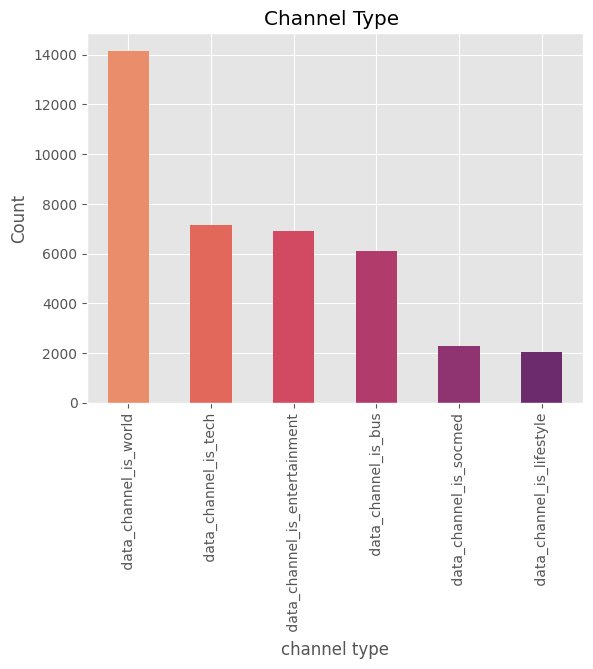

In [ ]:
plt.style.use("ggplot")
df['channel type'].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("Channel Type ")

* Was the article published on the weekend?

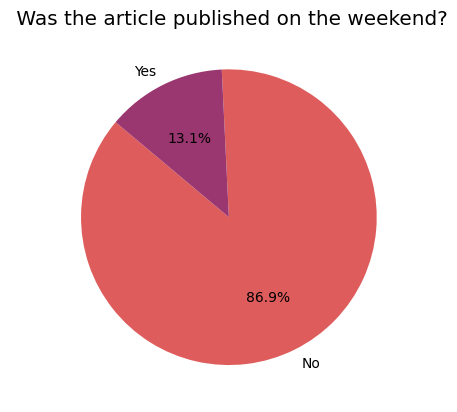

In [ ]:
plt.style.use("ggplot")

custom_palette = sns.color_palette("flare", len(df['isWeekEnd'].unique()))

counts = df['isWeekEnd'].value_counts()
plt.pie(counts, labels=counts.index, colors=custom_palette, autopct='%1.1f%%', startangle=140)

plt.title(" Was the article published on the weekend?")

plt.show()

* Explore The day of the week the article was published

Text(0.5, 1.0, 'On what day was the article published?')

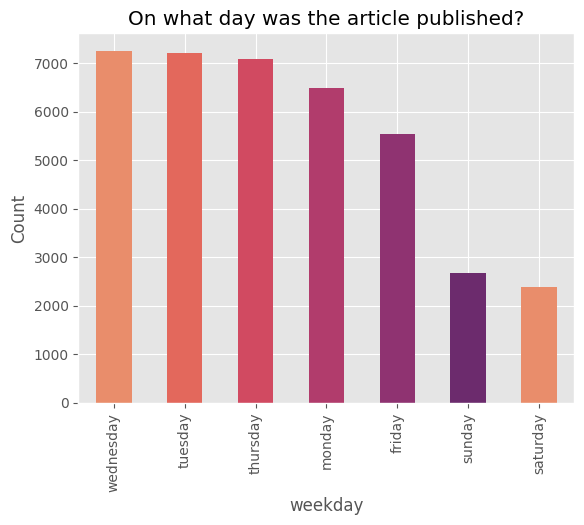

In [ ]:
plt.style.use("ggplot")
df['weekday'].value_counts().plot(kind="bar",color=sns.color_palette("flare"))
plt.ylabel("Count")
plt.title("On what day was the article published?")

* Visualizing the total number of shares received by articles published on each day of the week

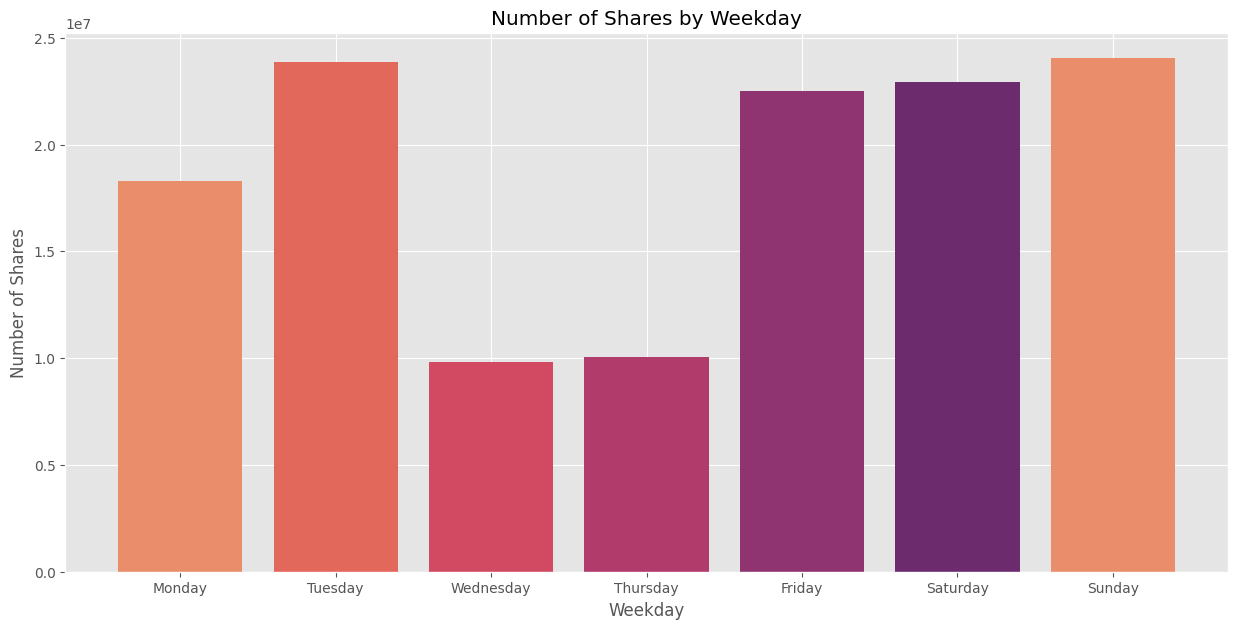

In [ ]:
shares_by_weekday = df.groupby('weekday')[' shares'].sum().reset_index()

shares_by_weekday = shares_by_weekday.sort_values('weekday')

plt.figure(figsize=(15, 7))
plt.bar(shares_by_weekday['weekday'], shares_by_weekday[' shares'], color=sns.color_palette("flare"), alpha=1)

plt.title('Number of Shares by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Shares')

plt.xticks(shares_by_weekday['weekday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


plt.show()

* visualizing the total number of shares by channel type

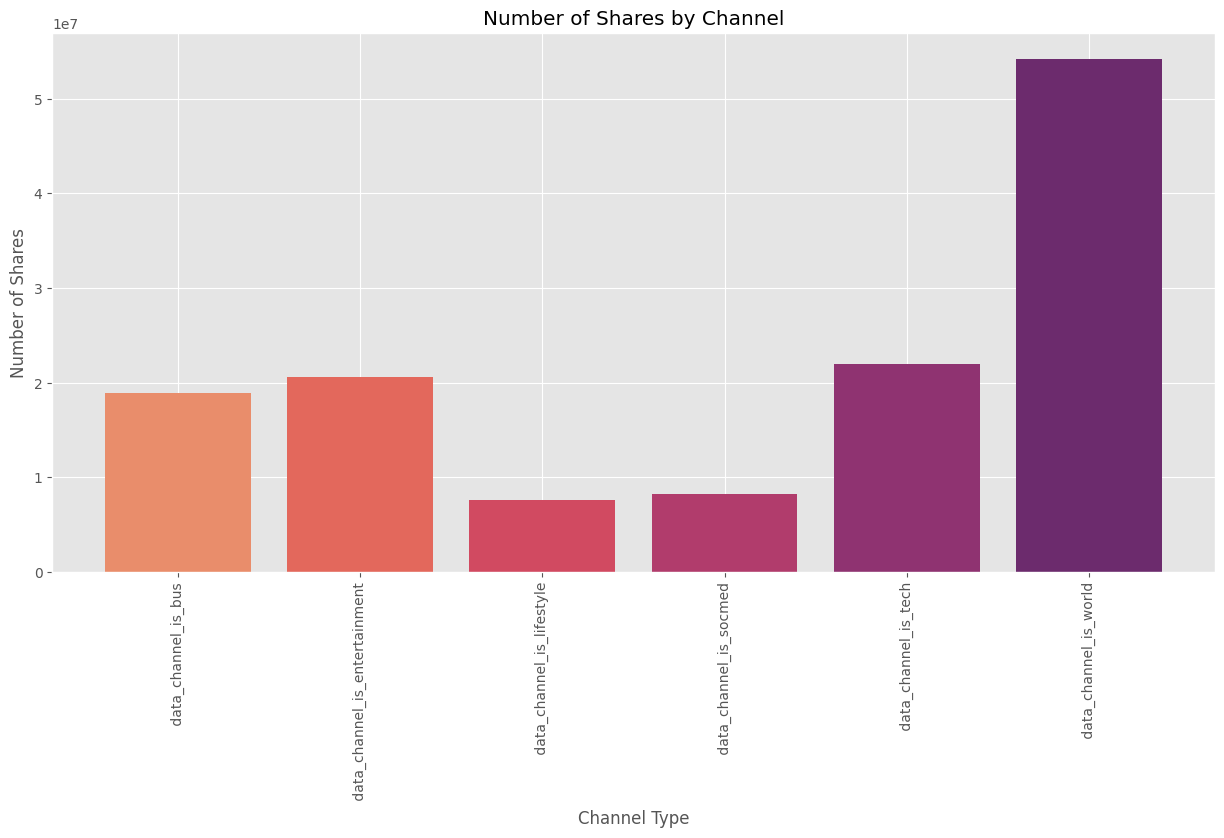

In [ ]:
shares_by_channel = df.groupby('channel type')[' shares'].sum().reset_index()

shares_by_channel = shares_by_channel.sort_values('channel type')

plt.figure(figsize=(15, 7))
plt.bar(shares_by_channel['channel type'], shares_by_channel[' shares'], color=sns.color_palette("flare"), alpha=1)
plt.title('Number of Shares by Channel')
plt.xlabel('Channel Type')
plt.ylabel('Number of Shares')
plt.xticks(rotation=90)
plt.show()

*  Visualize the distribution of topics represented by LDA (Latent Dirichlet Allocation)

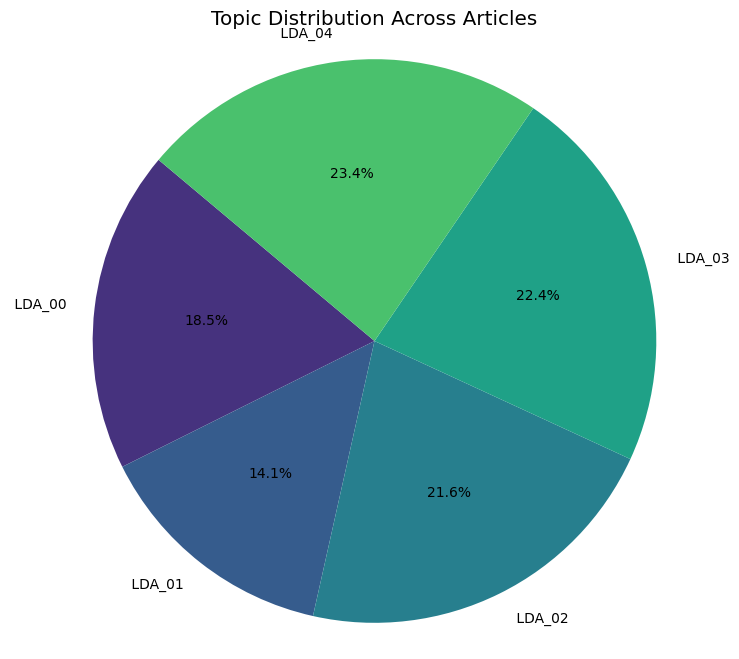

In [ ]:
topic_distribution = df[[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']].mean()

plt.figure(figsize=(8, 8))
plt.pie(topic_distribution, labels=topic_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Topic Distribution Across Articles')
plt.axis('equal')
plt.show()

Exploring the distribution of the data

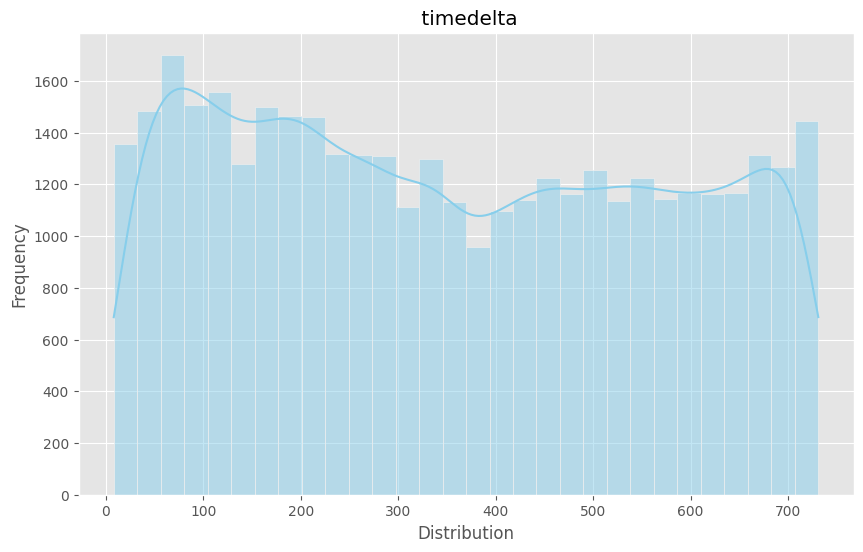

In [ ]:
plot_hist(df,' timedelta')

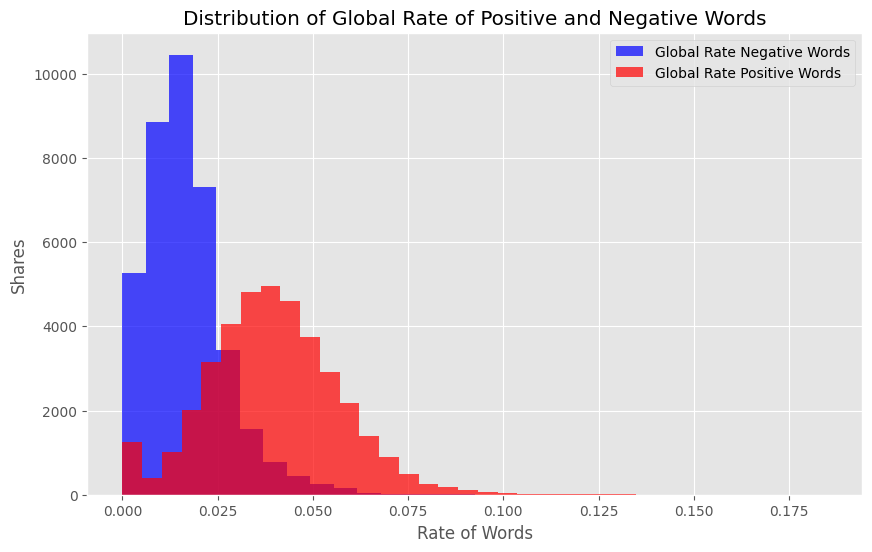

In [ ]:
df.columns = df.columns.str.strip()

plt.figure(figsize=(10, 6))

plt.hist(df['global_rate_negative_words'], bins=30, color='blue', alpha=0.7, label='Global Rate Negative Words')

plt.hist(df['global_rate_positive_words'], bins=30, color='red', alpha=0.7, label='Global Rate Positive Words')

plt.xlabel('Rate of Words')
plt.ylabel('Shares')
plt.title('Distribution of Global Rate of Positive and Negative Words')
plt.legend()

plt.show()

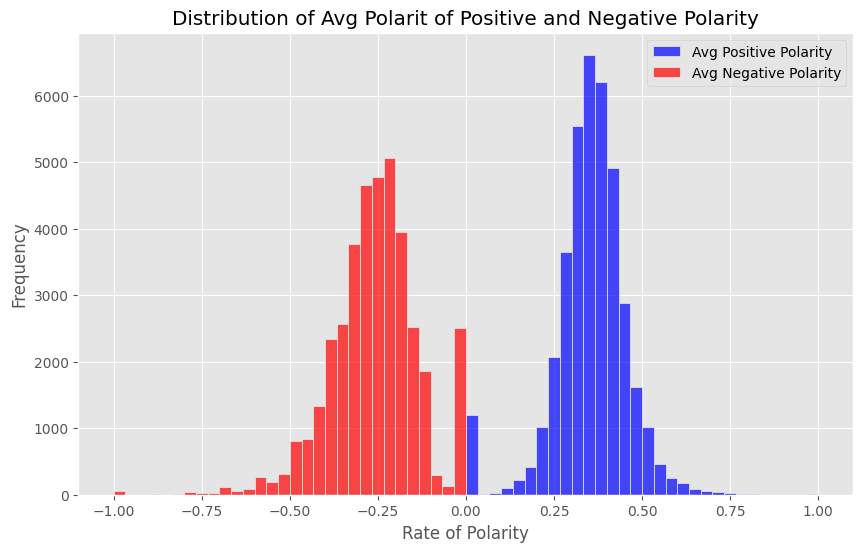

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_positive_polarity'], bins=30, color='blue', alpha=0.7, label='Avg Positive Polarity')

sns.histplot(df['avg_negative_polarity'], bins=30, color='red', alpha=0.7, label='Avg Negative Polarity')

plt.xlabel('Rate of Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Polarit of Positive and Negative Polarity')

plt.legend()

plt.show()

### **Encoding**

We will apply label encoder


In [ ]:
label_encoder_channel = LabelEncoder()
label_encoder_weekday = LabelEncoder()
label_encoder_isweekend = LabelEncoder()

df['channel type'] = label_encoder_channel.fit_transform(df['channel type'])
df['weekday'] = label_encoder_weekday.fit_transform(df['weekday'])
df['isWeekEnd'] = label_encoder_isweekend.fit_transform(df['isWeekEnd'])

In [ ]:
label_encoders = {
    'channel type': label_encoder_channel,
    'weekday': label_encoder_weekday,
    'isWeekEnd':label_encoder_isweekend
}

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
def getwords(text):

    text = str(text)

    text = text.lower()

    text = text.replace('-', ' ')

    words = text.split()

    return words

df['Title_words'] = df['title'].apply(lambda x: len(getwords(str(x))))

In [ ]:
df.drop(columns=['url'], inplace=True)

###**Skewness**

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
skew_values = numeric_df.skew()
print(skew_values)

title                           1.604696
timedelta                       0.118934
n_tokens_content                2.946153
n_unique_tokens               196.141875
n_non_stop_words              196.272787
n_non_stop_unique_tokens      195.937404
num_hrefs                       4.022640
num_self_hrefs                  5.182942
num_imgs                        3.967581
num_videos                      7.014902
average_token_length           -4.566256
num_keywords                   -0.150924
channel type                   -0.402175
kw_min_min                      2.376361
kw_max_min                     35.249817
kw_avg_min                     31.236906
kw_min_max                     10.399254
kw_max_max                     -2.648058
kw_avg_max                      0.625861
kw_min_avg                      0.467348
kw_max_avg                     16.576306
kw_avg_avg                      5.815468
self_reference_min_shares      26.665187
self_reference_max_shares      13.924262
self_reference_a

Skewness will be handled when outliers is handled

### **Normalization**

We will apply normalization to make values from -1 to 1

In [ ]:
from sklearn.preprocessing import Normalizer

numeric_columns = [col for col in df.select_dtypes(exclude=['object']).columns if col != 'isWeekEnd' and col != ' shares']
normalize_scaler = Normalizer()
df[numeric_columns] = normalize_scaler.fit_transform(df[numeric_columns])

with open('normalize_scaler.pkl', 'wb') as f:
    pickle.dump(normalize_scaler, f)

In [ ]:
df.head()

title  timedelta  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0  0.000040   0.000530          0.001152     5.354250e-07          0.000001   
1  0.000054   0.000191          0.000189     7.605051e-07          0.000001   
2  0.000031   0.000585          0.000234     7.083183e-07          0.000001   
3  0.000030   0.000460          0.000294     6.791704e-07          0.000001   
4  0.000033   0.000134          0.000532     5.921506e-07          0.000001   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0              7.649381e-07   0.000023        0.000006  0.000001    0.000000   
1              8.773982e-07   0.000008        0.000006  0.000004    0.000001   
2              9.128280e-07   0.000006        0.000002  0.000000    0.000000   
3              8.525893e-07   0.000006        0.000004  0.000001    0.000000   
4              7.842862e-07   0.000002        0.000002  0.000001    0.000000   

   ...  rate_positive_words  rate_negative_words  avg_positive_polarity  \
0  ...         7.597609e-07         3.798804e-07           3.815906e-07   
1  ...         9.224156e-07         2.515679e-07           3.424119e-07   
2  ...         8.797546e-07         2.513584e-07           4.653337e-07   
3  ...         1.168363e-06         0.000000e+00           3.660478e-07   
4  ...         4.978451e-07         6.510282e-07           3.047929e-07   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0           3.798804e-08           1.139641e-06          -3.371439e-07   
1           3.913278e-08           5.869918e-07          -3.228455e-07   
2           2.423814e-07           5.655565e-07          -3.393339e-07   
3           3.894544e-08           5.841816e-07           0.000000e+00   
4           7.180458e-08           5.744367e-07          -2.618755e-07   

   min_negative_polarity  max_negative_polarity    shares  Title_words  
0          -1.139641e-06          -5.698206e-08  0.003989     0.000001  
1          -4.695934e-07          -1.467479e-07  0.001409     0.000001  
2          -4.524452e-07          -2.262226e-07  0.002602     0.000001  
3           0.000000e+00           0.000000e+00  0.001986     0.000001  
4          -9.190987e-07          -1.148873e-07  0.000998     0.000001  

[5 rows x 46 columns]

### **Outliers**

In [ ]:
numeric_df = df.select_dtypes(include='number')
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
title                          4095
timedelta                      3093
n_tokens_content               3739
n_unique_tokens                4725
n_non_stop_words              11313
n_non_stop_unique_tokens       4940
num_hrefs                      3968
num_self_hrefs                 3554
num_imgs                       3280
num_videos                     3567
average_token_length           5804
num_keywords                   3094
channel type                   2431
kw_min_min                     4557
kw_max_min                     5299
kw_avg_min                     4504
kw_min_max                     4911
kw_max_max                     1825
kw_avg_max                       45
kw_min_avg                     1018
kw_max_avg                     4509
kw_avg_avg                     3718
self_reference_min_shares      5519
self_reference_max_shares      4453
self_reference_avg_sharess     4757
weekday                        2374
isWeekEnd                    

In [ ]:
numerical_preprocessing = {}

for column_name in df.columns:
    if column_name == ' shares' or column_name == 'isWeekEnd' or df[column_name].dtype == object:
        continue

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    numerical_preprocessing[column_name] = { 'lower_bound': lower_bound, 'upper_bound': upper_bound}

    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
with open('numerical_preprocessing.pkl', 'wb') as f:
    pickle.dump(numerical_preprocessing, f)

Here we replaced the values greater than upper bound with it and also in lower bound

# **Data Splitting**

In [ ]:
y = df['shares']
X = df.drop('shares', axis=1)

# **Feature Selection**

### **Pearson's Correlation**

In [ ]:
df.dtypes

title                         float64
timedelta                     float64
n_tokens_content              float64
n_unique_tokens               float64
n_non_stop_words              float64
n_non_stop_unique_tokens      float64
num_hrefs                     float64
num_self_hrefs                float64
num_imgs                      float64
num_videos                    float64
average_token_length          float64
num_keywords                  float64
channel type                  float64
kw_min_min                    float64
kw_max_min                    float64
kw_avg_min                    float64
kw_min_max                    float64
kw_max_max                    float64
kw_avg_max                    float64
kw_min_avg                    float64
kw_max_avg                    float64
kw_avg_avg                    float64
self_reference_min_shares     float64
self_reference_max_shares     float64
self_reference_avg_sharess    float64
weekday                       float64
isWeekEnd   

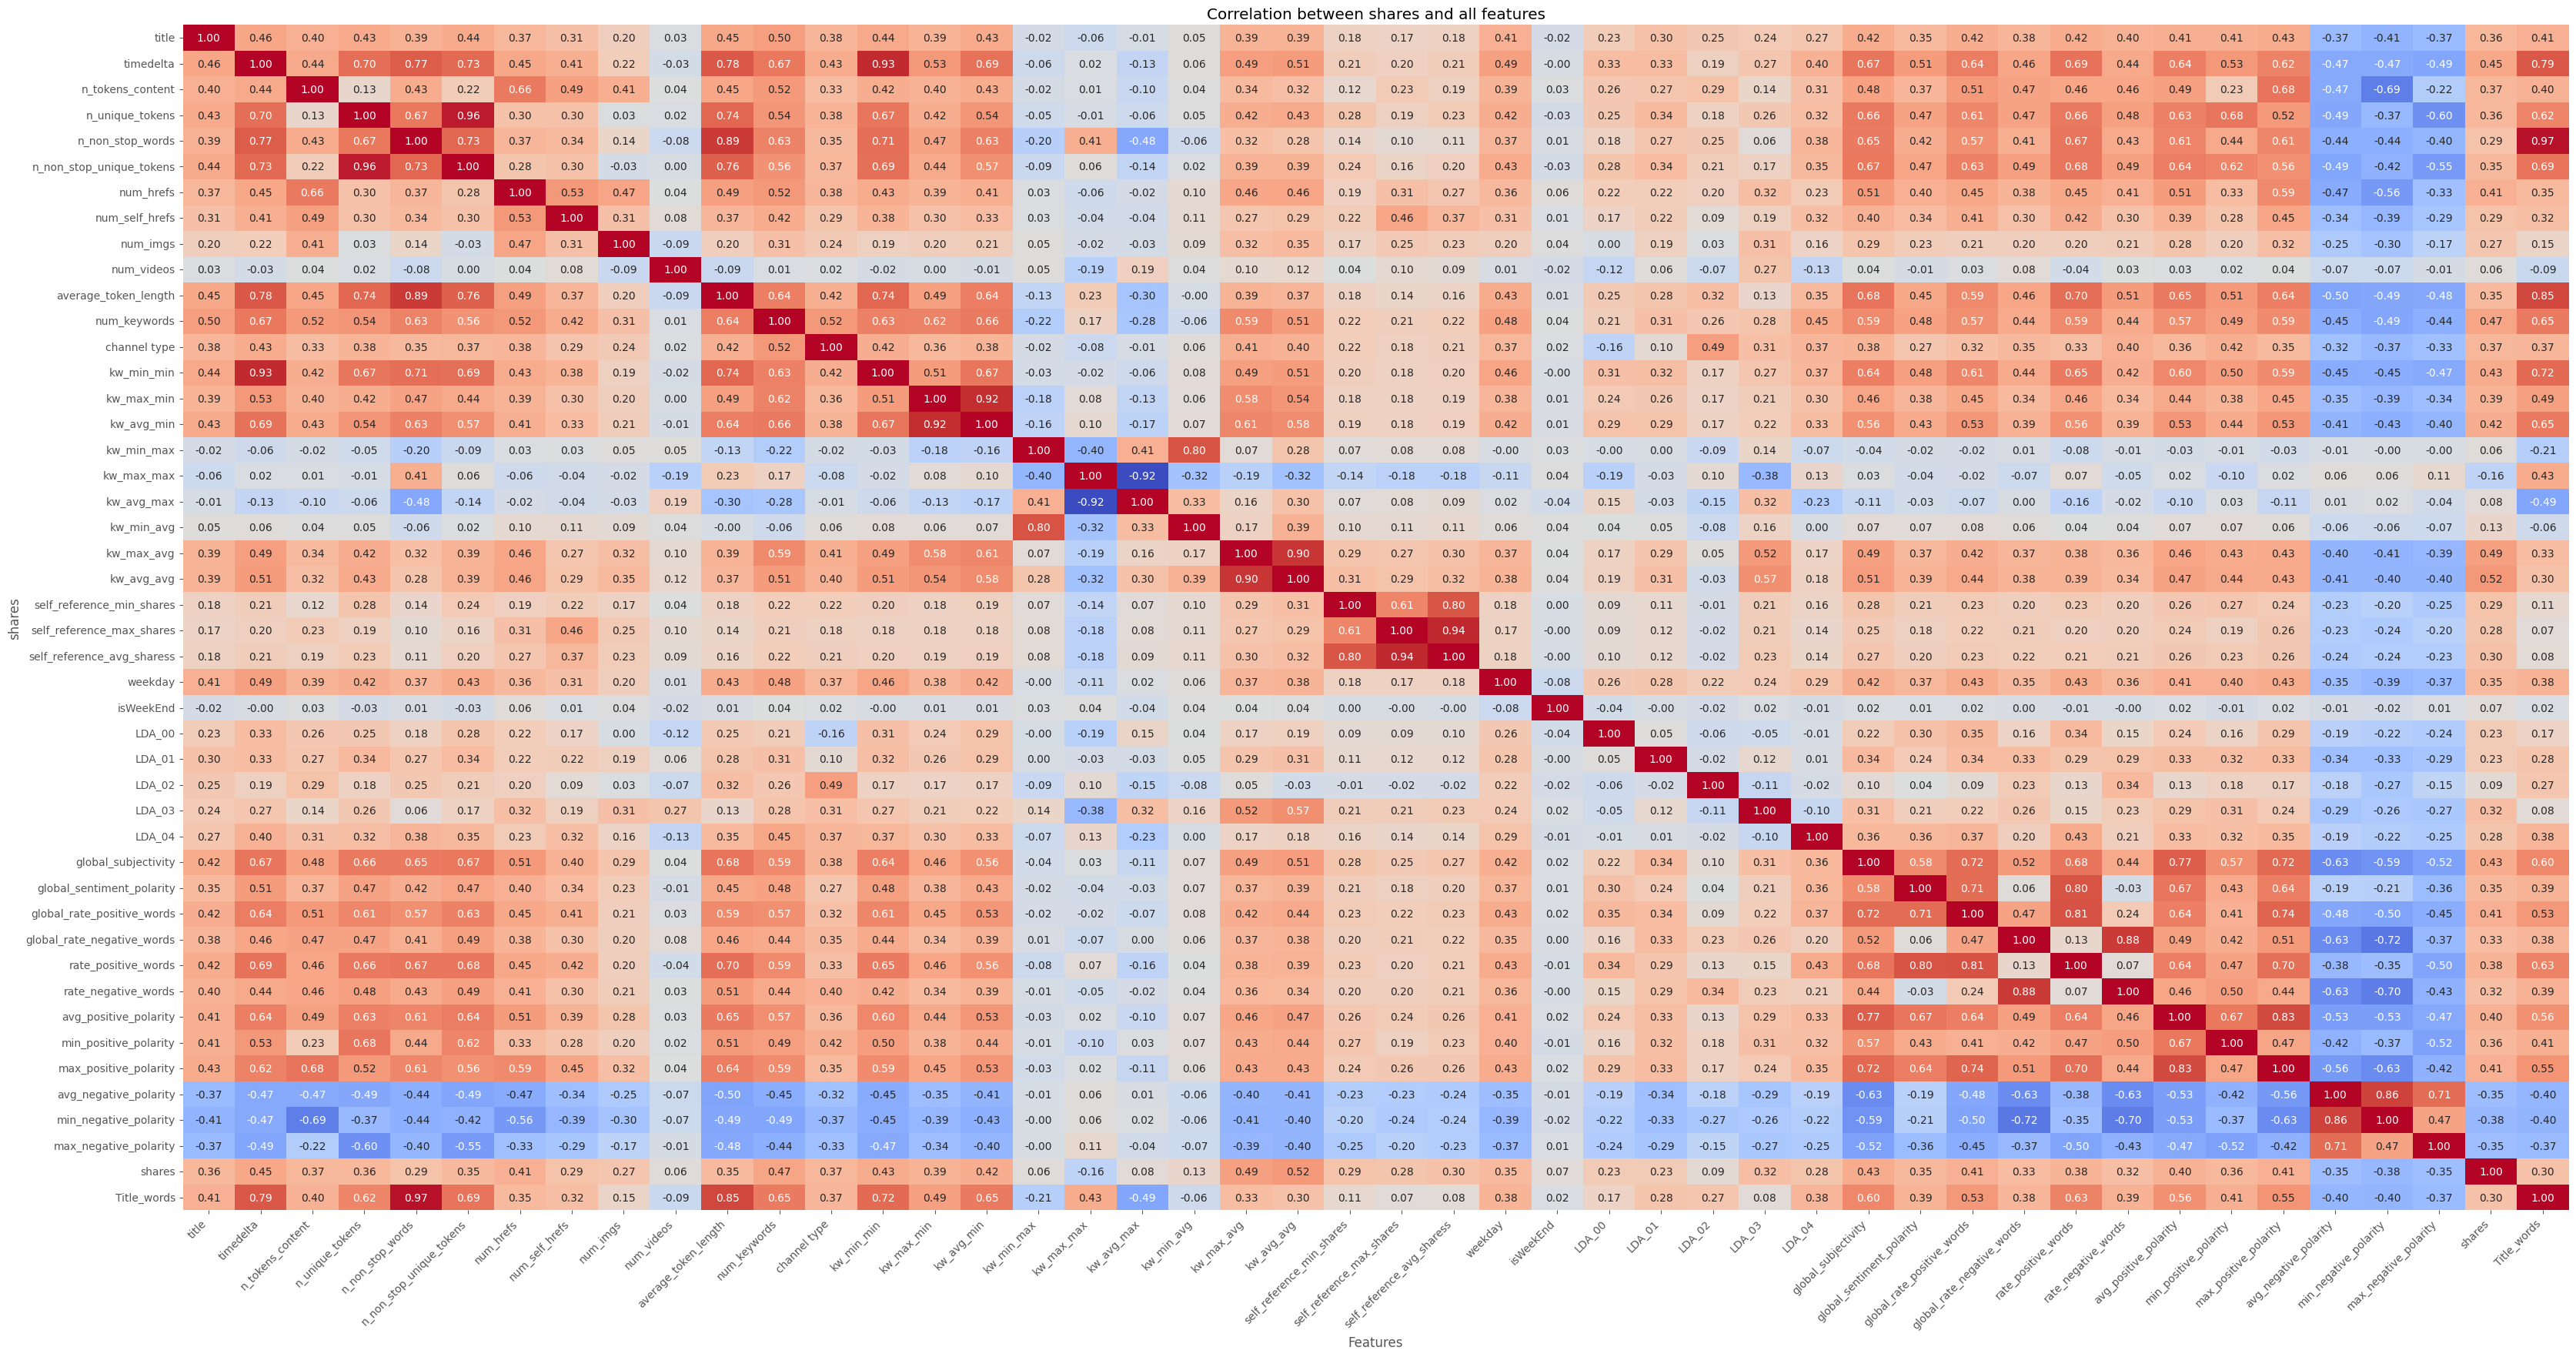

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title("Correlation between shares and all features")
plt.xlabel("Features")
plt.ylabel("shares")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
numeric_df_filtered = df.select_dtypes(include=['float64', 'int','bool'])
corr_with_shares = numeric_df_filtered.corr()['shares'].sort_values(ascending=False)
print("Correlation with 'shares':")
print(corr_with_shares)

Correlation with 'shares':
shares                        1.000000
kw_avg_avg                    0.524116
kw_max_avg                    0.487348
num_keywords                  0.465296
timedelta                     0.449236
global_subjectivity           0.430336
kw_min_min                    0.426704
kw_avg_min                    0.422122
num_hrefs                     0.407834
max_positive_polarity         0.406633
global_rate_positive_words    0.405788
avg_positive_polarity         0.397563
kw_max_min                    0.389439
rate_positive_words           0.379867
n_tokens_content              0.368447
channel type                  0.368296
min_positive_polarity         0.363212
n_unique_tokens               0.362127
title                         0.359504
global_sentiment_polarity     0.350791
n_non_stop_unique_tokens      0.350318
average_token_length          0.348041
weekday                       0.345587
global_rate_negative_words    0.334041
rate_negative_words           0.32213

### **RFE**

In [ ]:
estimator = Ridge(alpha=0.1)
selector = RFE(estimator, n_features_to_select=40, step=1)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print(selected_features)
X = df[selected_features]

with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

Index(['title', 'timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'average_token_length', 'num_keywords', 'channel type', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday',
       'isWeekEnd', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'Title_words'],
      dtype='object')


Here we took selected features from RFE and get it to the model

### **ANOVA**

In [ ]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

anova_results_sorted = anova_results.sort_values(by='F-Score', ascending=False)

top_40_features = anova_results_sorted.head(40)['Feature'].tolist()
print(top_40_features)

# X = df[top_40_features]

['kw_avg_max', 'isWeekEnd', 'kw_max_max', 'Title_words', 'LDA_01', 'kw_min_max', 'LDA_00', 'LDA_02', 'LDA_03', 'kw_max_avg', 'kw_avg_avg', 'global_subjectivity', 'kw_max_min', 'num_imgs', 'average_token_length', 'num_hrefs', 'kw_avg_min', 'avg_positive_polarity', 'self_reference_max_shares', 'self_reference_min_shares', 'title', 'LDA_04', 'timedelta', 'self_reference_avg_sharess', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'rate_positive_words', 'avg_negative_polarity', 'kw_min_min', 'max_positive_polarity', 'max_negative_polarity', 'n_tokens_content', 'num_keywords', 'rate_negative_words', 'global_sentiment_polarity', 'num_self_hrefs', 'min_negative_polarity', 'kw_min_avg', 'channel type', 'weekday']


# **Modelling**

### **Linear Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)*100

print("Training Set:")
print("Mean Squared Error (MSE) using Linear Regression:", mse_train)
print("Accuracy percentage using Linear Regression:", r2_train,'%')

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)*100

print("\nTest Set:")
print("Mean Squared Error (MSE) using Linear Regression:", mse_test)
print("Accuracy percentage using Linear Regression:", r2_test,'%')

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Training Set:
Mean Squared Error (MSE) using Linear Regression: 4.951673815445105e-06
Accuracy percentage using Linear Regression: 40.39376544789991 %

Test Set:
Mean Squared Error (MSE) using Linear Regression: 5.146324127962607e-06
Accuracy percentage using Linear Regression: 39.566081119992056 %


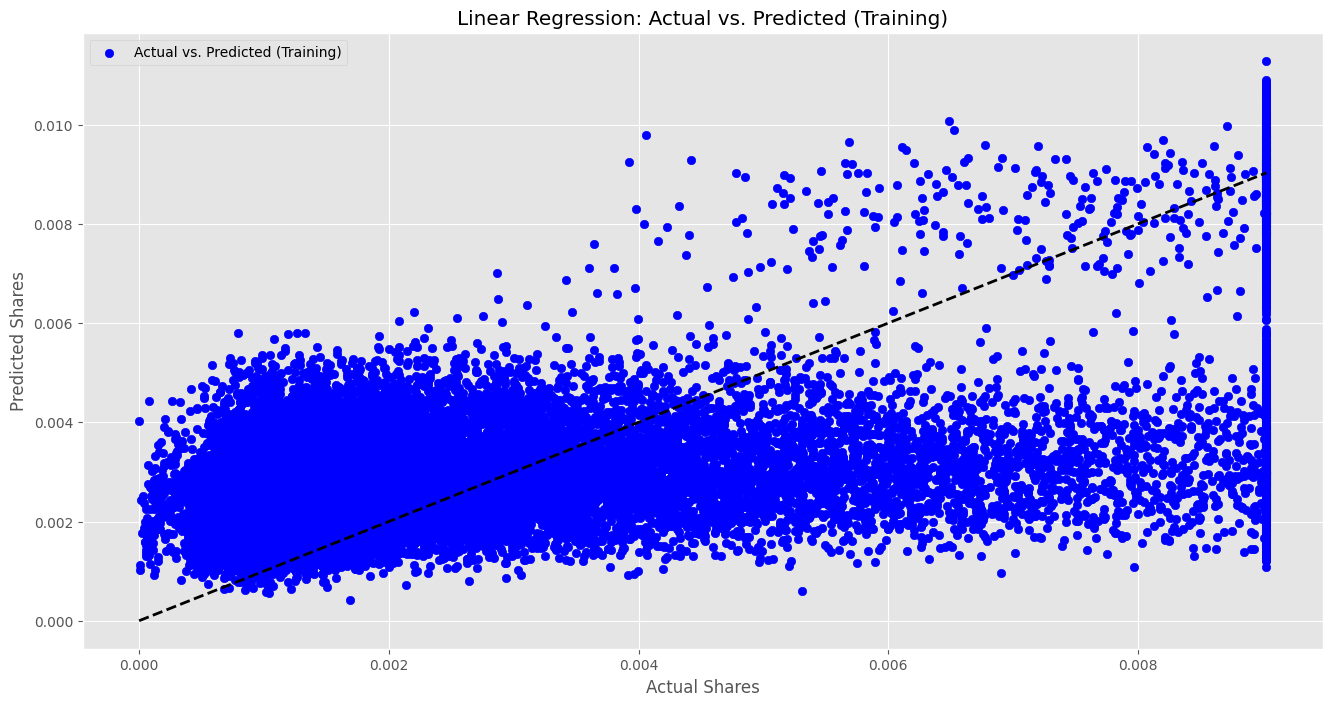

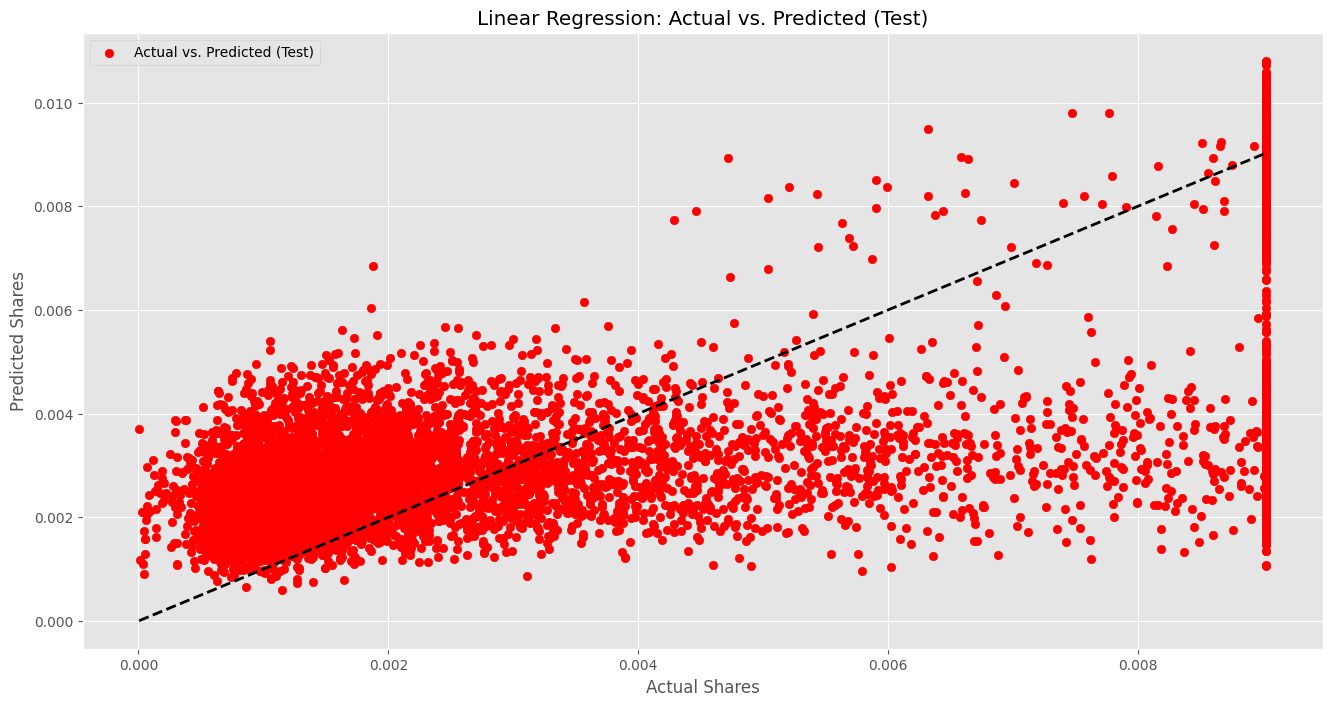

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Linear Regression: Actual vs. Predicted (Training)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_test_pred, color='red', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Linear Regression: Actual vs. Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

### **Polynomial Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)*100

print(f"Degree: {3}, Alpha: {0.1}\n")
print("Training Set:")
print("Mean Squared Error (MSE) using Polynomial Regression:", mse_train)
print("Accuracy percentage using Polynomial Regression:", r2_train,'%')

y_pred = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)*100

print("\nTest Set:")
print("Mean Squared Error (MSE) using Polynomial Regression:", mse_test)
print("Accuracy percentage using Polynomial Regression:", r2_test,'%')

with open('polynomial_regression_object.pkl', 'wb') as f:
    pickle.dump(poly_features, f)

with open('polynomial_regressio_Ridge.pkl', 'wb') as f:
    pickle.dump(model, f)

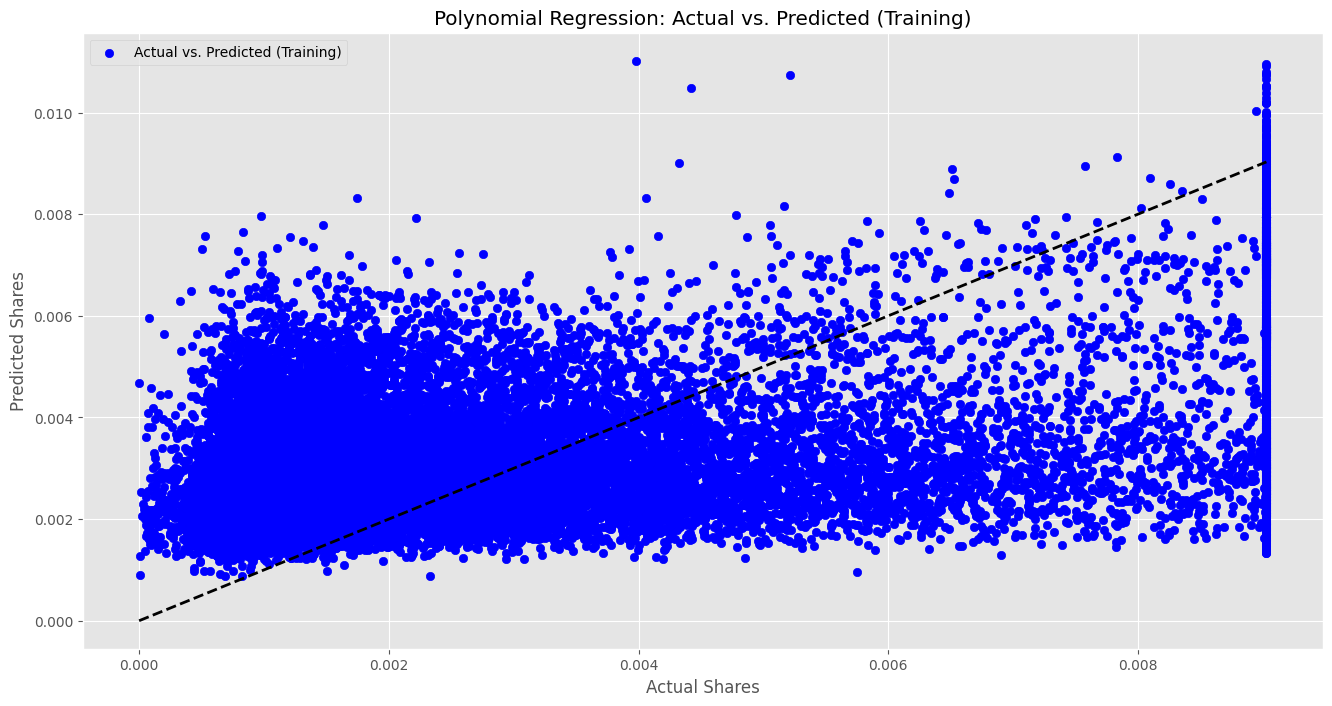

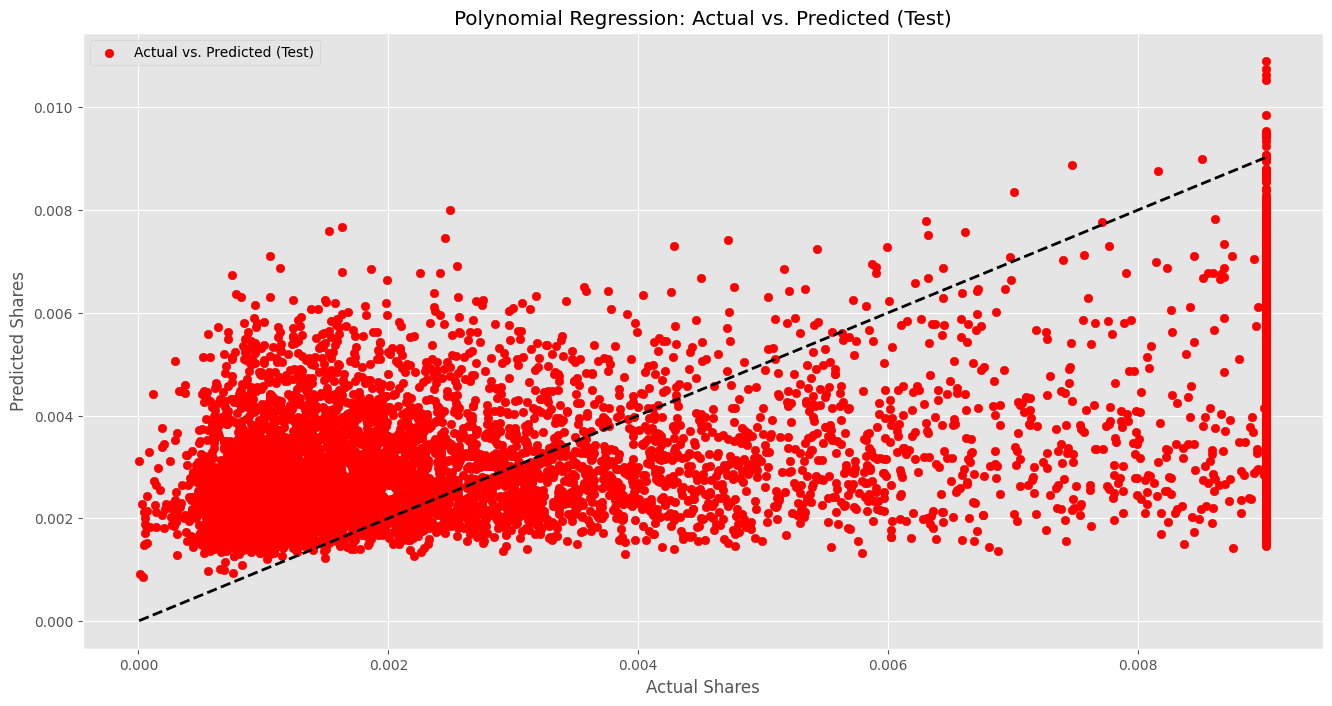

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Polynomial Regression: Actual vs. Predicted (Training)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_pred, color='red', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Polynomial Regression: Actual vs. Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

### **XG Boost**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=200,
                          random_state=45)

xg_reg.fit(X_train, y_train)

y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)*100
r2_test = r2_score(y_test, y_test_pred)*100

print("Training Set:")
print("Mean Squared Error (MSE) using XGBoost:", mse_train)
print("Accuracy percentage using XGBoost:", r2_train, '%')

print("\nTest Set:")
print("Mean Squared Error (MSE) using XGBoost:", mse_test)
print("Accuracy percentage using XGBoost:", r2_test, '%')

with open('Xg_Boost.pkl', 'wb') as f:
    pickle.dump(xg_reg, f)

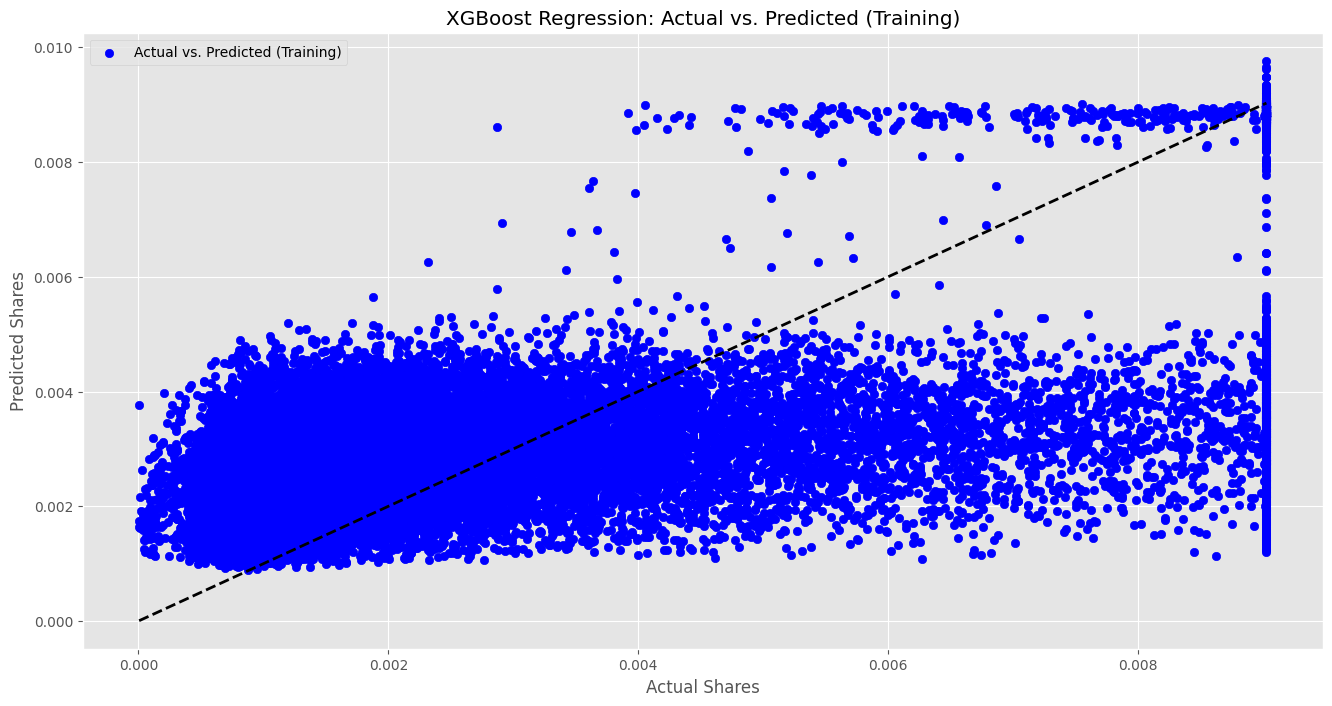

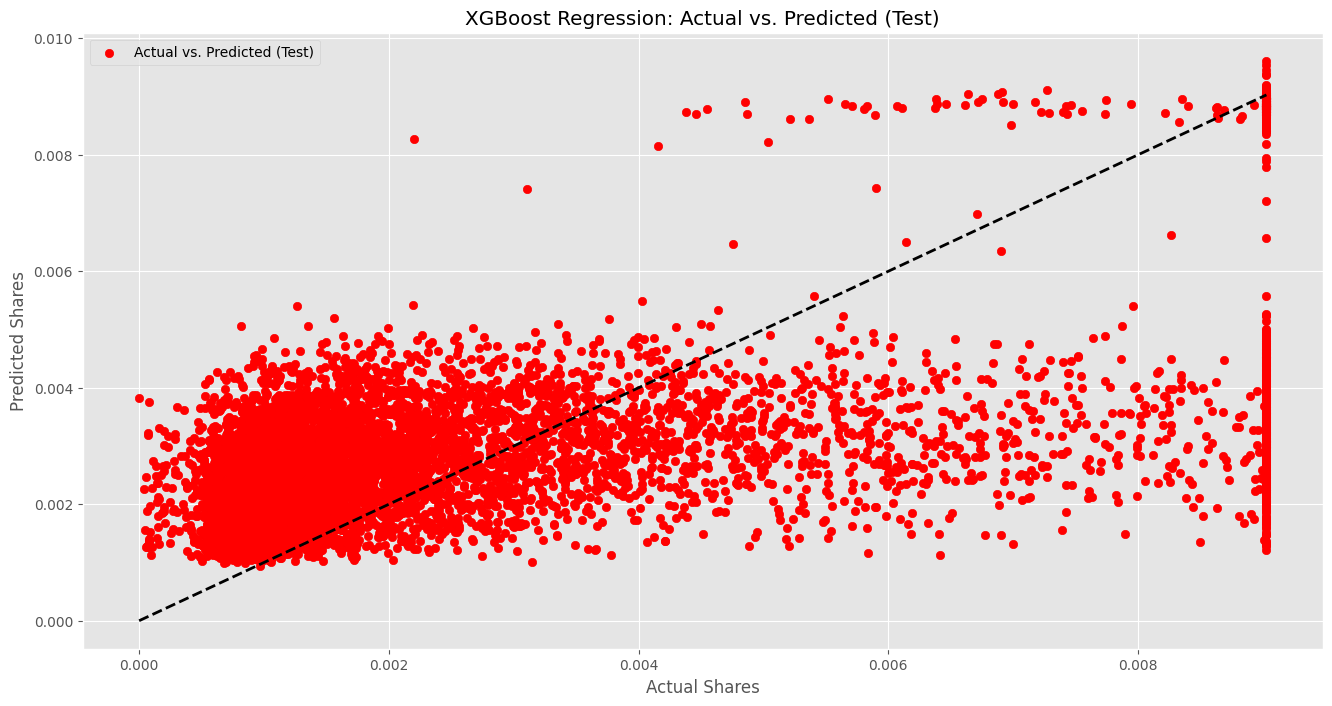

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('XGBoost Regression: Actual vs. Predicted (Training)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_test_pred, color='red', label='Actual vs. Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('XGBoost Regression: Actual vs. Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()